In [1]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving yelp_part2_shruthika.csv to yelp_part2_shruthika.csv


In [3]:
import pandas as pd
df = pd.read_csv("yelp_part2_shruthika.csv")

In [4]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=278764cc597f4f8cbf17735270be1ddec5320ec7e4caf2b207f60c7056641fdf
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [6]:
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import csv
from csv import reader
titles = []
with open("yelp_part2_shruthika.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [8]:
print(len(titles))

150050


In [9]:
values = []
for i in titles:
  try:
    values.append(i[0])
  except:
    pass

In [10]:
z = []
with open("yelp_part2_shruthika.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        z.append(row)

In [11]:
print(z[:10])

[['wifey took celebrate birthday best boomerang dinner parking breeze enter vegas blvd take elevator restaurant right huge blessing inch heels quietly reminding toes handle pain long look good there cool pawn shop upon entering everything sale even people walking explain later once pawn shop actual restaurant- atmosphere elegant sexy dimly fantastic mixing favorite jams aquanet clouds thing vibe intimate expect hear anything without yelling reading lips quite loud early really like nightclub good food food drink good selection craft cocktails wine even virgin cocktails names like garnet gimlet served coupe gases inbibers menu mostly tapas style options entrees oysters frozen mignonette granita refreshing beets creamy burata good served shmear beet purée tuna poke wonton tacos bite crispy deliciousness tomato soup dumplings surprisingly filled nice bites cheesey dumplings crispy crumbs homemade cavatelli good expecting something different cavatelli broccoli dish blew away wife lucky ord

In [12]:
values = []
values = z

In [13]:
values = []
for i in titles:
  try:
    values.append(i[0])
  except:
    pass


In [14]:
reviews = []
for i in z:
  try:
    reviews.append(i[0])
  except:
    pass

In [15]:
print(values[:10])

['wifey took celebrate birthday best boomerang dinner parking breeze enter vegas blvd take elevator restaurant right huge blessing inch heels quietly reminding toes handle pain long look good there cool pawn shop upon entering everything sale even people walking explain later once pawn shop actual restaurant- atmosphere elegant sexy dimly fantastic mixing favorite jams aquanet clouds thing vibe intimate expect hear anything without yelling reading lips quite loud early really like nightclub good food food drink good selection craft cocktails wine even virgin cocktails names like garnet gimlet served coupe gases inbibers menu mostly tapas style options entrees oysters frozen mignonette granita refreshing beets creamy burata good served shmear beet purée tuna poke wonton tacos bite crispy deliciousness tomato soup dumplings surprisingly filled nice bites cheesey dumplings crispy crumbs homemade cavatelli good expecting something different cavatelli broccoli dish blew away wife lucky orde

In [16]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = values
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)


dictionary = corpora.Dictionary(texts)
    

corpus = [dictionary.doc2bow(text) for text in texts]




In [19]:
# generate LDA model
lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=8, workers=4, chunksize=20, passes=1, batch=True, alpha='symmetric',
                 eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=1,
                 gamma_threshold=0.01, random_state=12)
top_8 = lda.print_topics(num_topics=8, num_words=5)

c = 0
for i in top_8:

  c += 1
  print("Topic "+str(c))
  print(i)
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.011*"place" + 0.010*"good" + 0.009*"would" + 0.009*"order" + 0.009*"great"')
Topic 2
(1, '0.012*"place" + 0.011*"food" + 0.009*"servic" + 0.008*"great" + 0.008*"like"')
Topic 3
(2, '0.012*"good" + 0.011*"place" + 0.010*"time" + 0.009*"food" + 0.008*"would"')
Topic 4
(3, '0.010*"food" + 0.010*"good" + 0.009*"place" + 0.008*"great" + 0.007*"order"')
Topic 5
(4, '0.010*"food" + 0.009*"good" + 0.009*"great" + 0.008*"time" + 0.008*"order"')
Topic 6
(5, '0.012*"food" + 0.011*"place" + 0.010*"time" + 0.009*"good" + 0.008*"great"')
Topic 7
(6, '0.012*"food" + 0.011*"good" + 0.009*"great" + 0.007*"servic" + 0.007*"place"')
Topic 8
(7, '0.013*"place" + 0.010*"food" + 0.009*"good" + 0.009*"time" + 0.008*"great"')
0.333092877001367


In [21]:
coh = []
for i in range(6, 12):
  lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=9, workers=20, chunksize=20, passes=1, batch=True, alpha='symmetric',
                  eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=i,
                  gamma_threshold=0.01, random_state=12)
  top_9 = lda.print_topics(num_topics=9, num_words=5)
  c = 0
  for i in top_9:
    c += 1
    print("Topic "+str(c))
    print(i)

  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  coh.append(coherence_model_lda.get_coherence())
  print(coherence_model_lda.get_coherence())

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.011*"place" + 0.010*"order" + 0.010*"would" + 0.009*"great" + 0.009*"good"')
Topic 2
(1, '0.013*"place" + 0.011*"food" + 0.009*"great" + 0.009*"servic" + 0.008*"order"')
Topic 3
(2, '0.012*"good" + 0.011*"place" + 0.010*"time" + 0.009*"would" + 0.009*"great"')
Topic 4
(3, '0.010*"food" + 0.009*"place" + 0.009*"good" + 0.009*"great" + 0.008*"order"')
Topic 5
(4, '0.010*"food" + 0.009*"great" + 0.009*"good" + 0.008*"order" + 0.008*"time"')
Topic 6
(5, '0.012*"food" + 0.012*"place" + 0.010*"time" + 0.009*"great" + 0.008*"good"')
Topic 7
(6, '0.013*"food" + 0.011*"good" + 0.009*"great" + 0.008*"servic" + 0.007*"realli"')
Topic 8
(7, '0.013*"place" + 0.009*"food" + 0.009*"time" + 0.008*"good" + 0.008*"great"')
Topic 9
(8, '0.012*"good" + 0.009*"like" + 0.009*"food" + 0.009*"time" + 0.007*"place"')


0.33265196996828794


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.011*"place" + 0.010*"order" + 0.010*"would" + 0.009*"great" + 0.009*"good"')
Topic 2
(1, '0.013*"place" + 0.011*"food" + 0.009*"great" + 0.009*"servic" + 0.008*"order"')
Topic 3
(2, '0.012*"good" + 0.011*"place" + 0.010*"time" + 0.009*"would" + 0.009*"great"')
Topic 4
(3, '0.010*"food" + 0.009*"place" + 0.009*"good" + 0.009*"great" + 0.008*"order"')
Topic 5
(4, '0.010*"food" + 0.009*"great" + 0.009*"good" + 0.008*"order" + 0.008*"time"')
Topic 6
(5, '0.012*"food" + 0.012*"place" + 0.010*"time" + 0.009*"great" + 0.008*"good"')
Topic 7
(6, '0.014*"food" + 0.012*"good" + 0.010*"great" + 0.008*"servic" + 0.007*"realli"')
Topic 8
(7, '0.013*"place" + 0.009*"food" + 0.009*"time" + 0.008*"good" + 0.008*"great"')
Topic 9
(8, '0.013*"good" + 0.009*"like" + 0.009*"food" + 0.009*"time" + 0.007*"servic"')


0.331208610246861


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.011*"place" + 0.010*"order" + 0.010*"would" + 0.009*"great" + 0.009*"good"')
Topic 2
(1, '0.013*"place" + 0.011*"food" + 0.009*"great" + 0.009*"servic" + 0.008*"order"')
Topic 3
(2, '0.012*"good" + 0.011*"place" + 0.010*"time" + 0.009*"would" + 0.009*"great"')
Topic 4
(3, '0.010*"food" + 0.009*"place" + 0.009*"good" + 0.008*"great" + 0.008*"order"')
Topic 5
(4, '0.010*"food" + 0.009*"great" + 0.008*"good" + 0.008*"order" + 0.008*"time"')
Topic 6
(5, '0.013*"food" + 0.012*"place" + 0.010*"time" + 0.009*"great" + 0.008*"good"')
Topic 7
(6, '0.014*"food" + 0.012*"good" + 0.010*"great" + 0.008*"servic" + 0.007*"realli"')
Topic 8
(7, '0.014*"place" + 0.009*"food" + 0.008*"time" + 0.008*"good" + 0.008*"great"')
Topic 9
(8, '0.013*"good" + 0.009*"like" + 0.009*"time" + 0.009*"food" + 0.007*"servic"')


0.331208610246861


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.011*"place" + 0.010*"order" + 0.010*"would" + 0.009*"great" + 0.009*"time"')
Topic 2
(1, '0.013*"place" + 0.011*"food" + 0.009*"great" + 0.009*"servic" + 0.008*"order"')
Topic 3
(2, '0.012*"good" + 0.011*"place" + 0.010*"time" + 0.009*"would" + 0.009*"great"')
Topic 4
(3, '0.010*"food" + 0.009*"place" + 0.009*"good" + 0.008*"great" + 0.008*"order"')
Topic 5
(4, '0.009*"food" + 0.009*"great" + 0.008*"order" + 0.008*"good" + 0.008*"time"')
Topic 6
(5, '0.013*"food" + 0.013*"place" + 0.010*"time" + 0.009*"great" + 0.008*"good"')
Topic 7
(6, '0.014*"food" + 0.012*"good" + 0.010*"great" + 0.008*"servic" + 0.007*"realli"')
Topic 8
(7, '0.014*"place" + 0.009*"food" + 0.008*"time" + 0.008*"good" + 0.008*"great"')
Topic 9
(8, '0.013*"good" + 0.009*"like" + 0.009*"time" + 0.009*"food" + 0.007*"servic"')


0.33209907867551475


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.011*"place" + 0.011*"order" + 0.010*"would" + 0.009*"great" + 0.009*"time"')
Topic 2
(1, '0.014*"place" + 0.011*"food" + 0.009*"great" + 0.009*"servic" + 0.008*"order"')
Topic 3
(2, '0.012*"good" + 0.011*"place" + 0.010*"time" + 0.009*"would" + 0.009*"back"')
Topic 4
(3, '0.010*"food" + 0.009*"place" + 0.009*"good" + 0.008*"great" + 0.008*"order"')
Topic 5
(4, '0.009*"food" + 0.009*"great" + 0.008*"order" + 0.008*"good" + 0.008*"time"')
Topic 6
(5, '0.013*"food" + 0.013*"place" + 0.010*"time" + 0.009*"great" + 0.008*"good"')
Topic 7
(6, '0.014*"food" + 0.012*"good" + 0.010*"great" + 0.008*"servic" + 0.007*"realli"')
Topic 8
(7, '0.014*"place" + 0.009*"food" + 0.008*"time" + 0.008*"good" + 0.007*"great"')
Topic 9
(8, '0.013*"good" + 0.009*"like" + 0.009*"time" + 0.009*"food" + 0.007*"servic"')


0.3322664798128879


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic 1
(0, '0.011*"order" + 0.011*"place" + 0.010*"would" + 0.009*"great" + 0.009*"time"')
Topic 2
(1, '0.014*"place" + 0.011*"food" + 0.009*"great" + 0.009*"servic" + 0.008*"order"')
Topic 3
(2, '0.012*"good" + 0.011*"place" + 0.010*"time" + 0.009*"would" + 0.009*"back"')
Topic 4
(3, '0.010*"food" + 0.009*"place" + 0.008*"good" + 0.008*"great" + 0.008*"order"')
Topic 5
(4, '0.009*"food" + 0.009*"great" + 0.009*"order" + 0.008*"good" + 0.008*"time"')
Topic 6
(5, '0.013*"food" + 0.013*"place" + 0.010*"time" + 0.009*"great" + 0.008*"good"')
Topic 7
(6, '0.014*"food" + 0.012*"good" + 0.010*"great" + 0.008*"servic" + 0.008*"realli"')
Topic 8
(7, '0.014*"place" + 0.009*"food" + 0.008*"time" + 0.008*"good" + 0.007*"great"')
Topic 9
(8, '0.013*"good" + 0.009*"like" + 0.009*"time" + 0.009*"food" + 0.007*"servic"')
0.3319209557981402


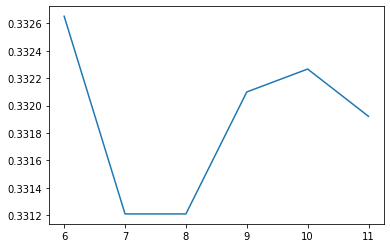

In [22]:
import matplotlib.pyplot as plt
x = [*(range(6, 12))]
y = coh
plt.plot(x, y)
plt.show()